# Trying Data Augmentation strategies

In [2]:
import os
import sys
import time
from pathlib import Path
module_path = os.path.abspath('../src/utils')
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib 
from deepbrain import Extractor
import ants

from base_mri import list_available_images, delete_useless_images, set_env_variables, load_mri, save_mri, create_file_name_from_path,save_batch_mri

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
os.listdir("/home/lucasthim1/mmml-alzheimer-diagnosis/data/preprocessed/")[:10]

['20210331', '20210320', '20210328']

In [4]:
input_path = "/home/lucasthim1/mmml-alzheimer-diagnosis/data/preprocessed/20210320/ADNI_014_S_4615_MR_MT1__GradWarp__N3m_Br_20120405104659318_S145232_I295883.npz"
input_path2 = "/home/lucasthim1/mmml-alzheimer-diagnosis/data/preprocessed/20210320/ADNI_010_S_4135_MR_MT1__N3m_Br_20110804075757773_S116397_I248671.npz"
input_path3 = "/home/lucasthim1/mmml-alzheimer-diagnosis/data/preprocessed/20210320/ADNI_072_S_4131_MR_MT1__GradWarp__N3m_Br_20110804073741464_S115986_I248648.npz"
output_path = "/home/lucasthim1/alzheimer_data/test/"
atlas_path = '/home/lucasthim1/alzheimer_data/Atlas/atlas_t1.nii'

sample = load_mri(input_path,as_ants=False)
sample1 = load_mri(input_path,as_ants=True)
sample2 = load_mri(input_path2,as_ants=False)
sample3 = load_mri(input_path3,as_ants=False)

In [190]:
def show_slices(img):
    img_size = img.shape
    img.plot(axis =0,figsize=2,nslices=6,title=f'Image size: {img_size}')
    img.plot(axis =1,figsize=2,nslices=6,title=f'Image size: {img_size}')
    img.plot(axis =2,figsize=2,nslices=6,title=f'Image size: {img_size}')

# def show_brain_center_slice(img: np.memmap):
#     slice_0 = img[int(img.shape[0]/2), :, :]
#     slice_1 = img[:, int(img.shape[1]/2), :]
#     slice_2 = img[:, :, int(img.shape[2]/2)]
#     show_slices([slice_0, slice_1, slice_2],img)


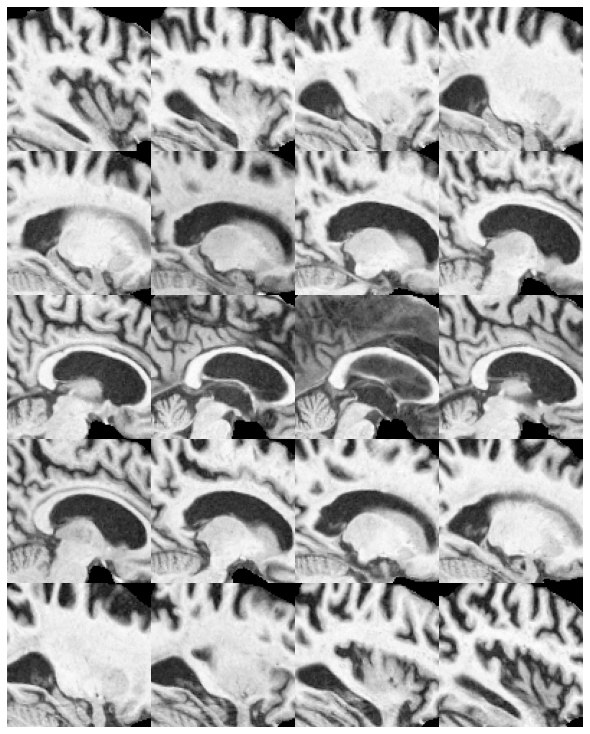

In [5]:
sample1.plot(axis =0,figsize=2,nslices=20)

/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



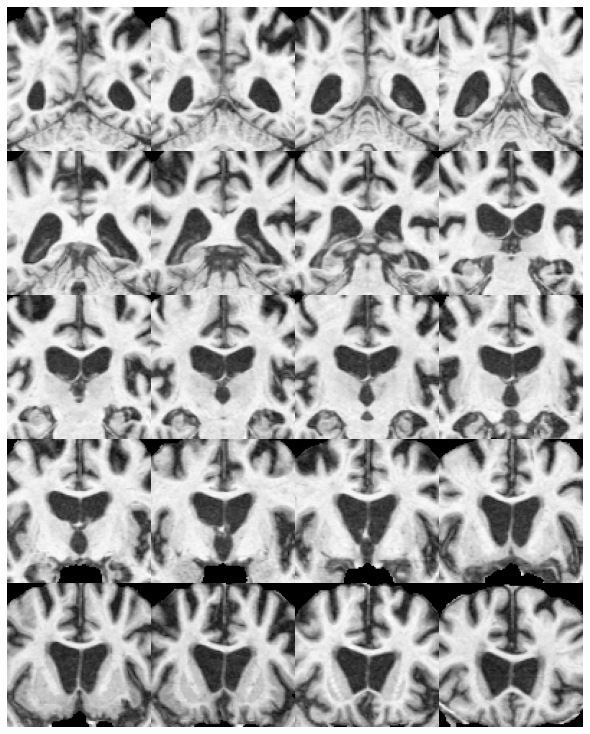

In [9]:
sample1.plot(axis =1,figsize=2,nslices=20)


# Applying Simple Data Augmentation Processes

1. 90º Rotation
2. 180º Rotation
3. 270º Rotation 
4. Horizontal Flipping
5. Vertical Flipping

Axis:
- 0 = sagittal (side of the head)
- 1 = coronal (front/back of the head)
- 2 = axial (top/bottom of the head)

In [191]:
def show_slices(slices,image_orientation = 'Coronal'):
    """ Function to display 2D MRI"""
    fig, axes = plt.subplots(1, len(slices))
    if len(slices) > 4:
        fig.set_size_inches(20,8)
    else:
        fig.set_size_inches(15,8)
        
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap="gray", origin="lower")
#     plt.suptitle(f"{image_orientation} image - size = {slices[0].shape}",fontsize=20,y=0.75)
    plt.tight_layout()
    plt.show()

In [192]:
slice_point = 80
image_orientation = 'sagittal'
operation_type = 'rot_90'
image = load_mri(input_path,as_ants=False)
image_2d = image[:,:,slice_point]
# 0 - Sagittal
# 1 - Coronal
# 2 - Axial

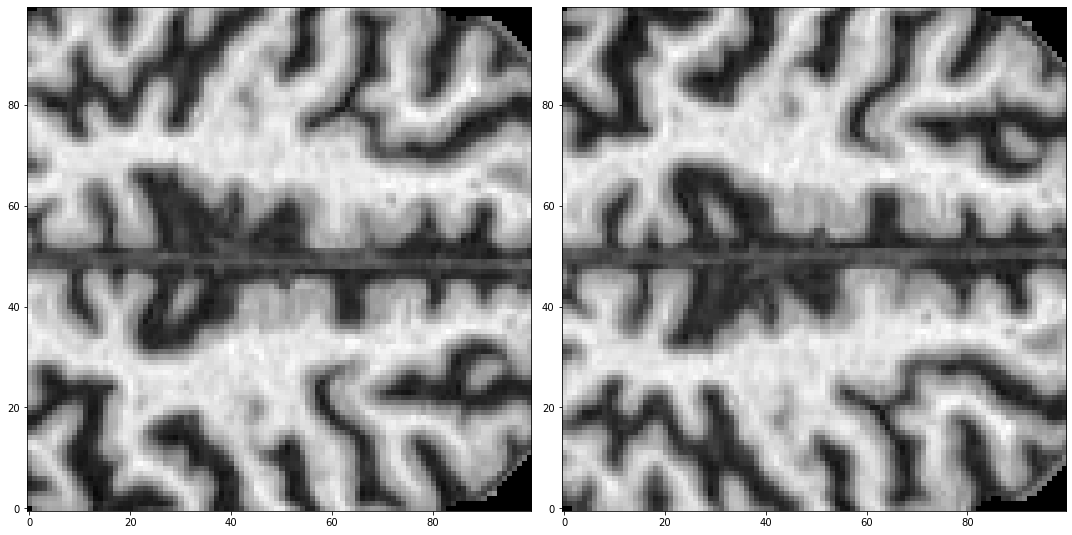

In [67]:
img_rot_90 = np.rot90(image_2d, k=1, axes=(1,0)).copy()
img_rot_180 = np.rot90(image_2d, k=2, axes=(1,0)).copy()
img_rot_270 = np.rot90(image_2d, k=3, axes=(1,0)).copy()
img_flip_horizonal = np.fliplr(image_2d).copy()
img_flip_vertical = np.flipud(image_2d).copy()

show_slices([image_2d,img_flip_vertical])
# show_slices([image_2d,img_rot_90,img_rot_180,img_rot_270,img_flip_horizonal,img_flip_vertical])

In [100]:
def generate_augmented_slice(image_2d):
    img_rot_90 = np.rot90(image_2d, k=1, axes=(1,0))
    img_rot_180 = np.rot90(image_2d, k=2, axes=(1,0))
    img_rot_270 = np.rot90(image_2d, k=3, axes=(1,0))
    img_flip_horizonal = np.fliplr(image_2d)
    img_flip_vertical = np.flipud(image_2d)

    img_dict = {
        'rot_90':img_rot_90,
        'rot_180':img_rot_180,
        'rot_270':img_rot_270,
        'flip_horizonal':img_flip_horizonal,
        'flip_vertical':img_flip_vertical
    }
    return img_dict

In [16]:
img_dict = generate_augmented_slice(image_2d)

# Distribution Analysis for Data Sampling

In [122]:
import random

In [175]:
sampling_range = 5
orientation_slice = 10
num_augmented_images = 5

In [218]:
neighbor_samples = list(set(range(orientation_slice-sampling_range,orientation_slice+sampling_range+1)) - set([orientation_slice]))
random.seed(a=None, version=2)
samples = random.sample(neighbor_samples,k=num_augmented_images) 


/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



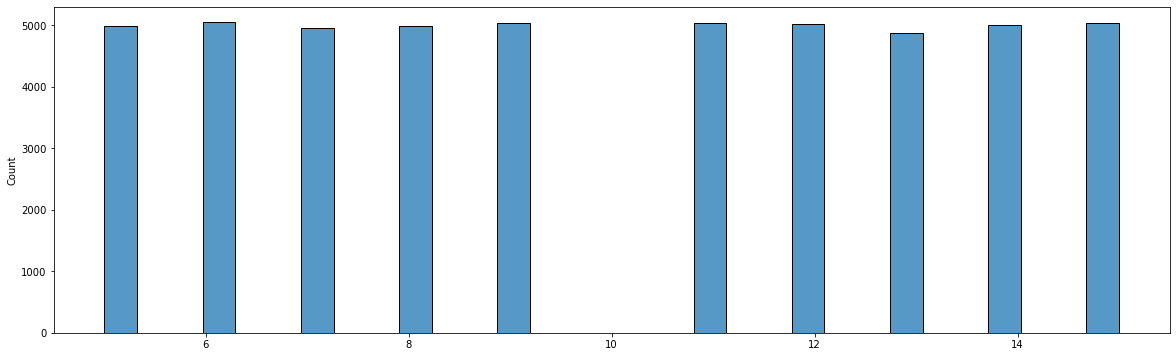

In [220]:
arr = np.ravel(arr)
fig,ax = plt.subplots(figsize=(20,6))
sns.histplot(arr)
plt.show()

# Checking samples processed with .py script

In [193]:
np.sort(os.listdir("/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/final_mri_20210327/"))[:6]

array(['ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_flip_horizonal.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_flip_vertical.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_rot_180.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_rot_270.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_rot_90.nii.gz'],
      dtype='<U130')

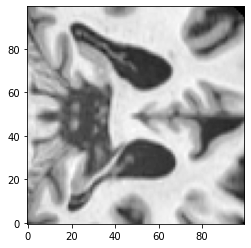

In [91]:
new_input_path = '/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/final_mri_20210327/ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_28.npz'
sample2 = load_mri(new_input_path,as_ants=False)
# sample2.plot()
plt.imshow(sample2,cmap="gray", origin="lower")

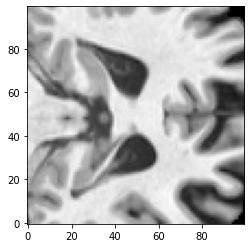

In [90]:
new_input_path = '/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/final_mri_20210327/ADNI_002_S_4447_MR_MT1__N3m_Br_20120125130711463_S137139_I280562_coronal_31.npz'
sample2 = load_mri(new_input_path,as_ants=False)
plt.imshow(sample2,cmap="gray", origin="lower")

In [194]:
np.sort(os.listdir("/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/final_mri_20210327/"))[:6]

array(['ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_flip_horizonal.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_flip_vertical.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_rot_180.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_rot_270.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_rot_90.nii.gz'],
      dtype='<U130')

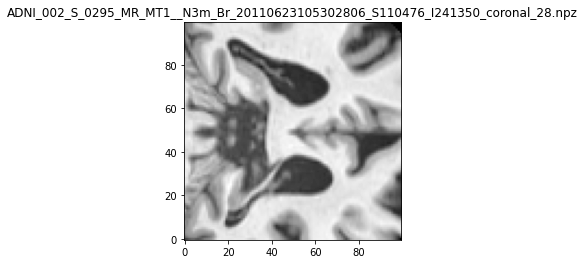

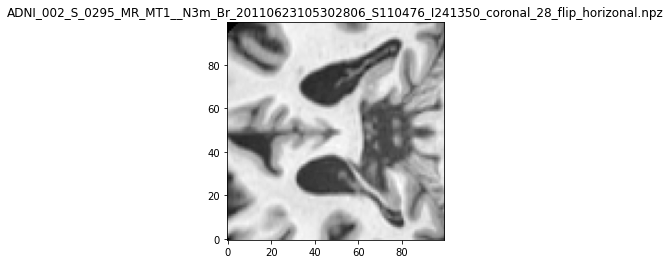

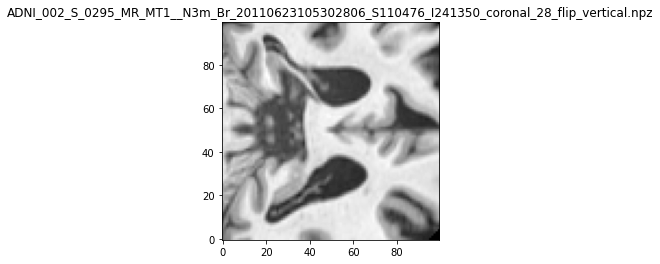

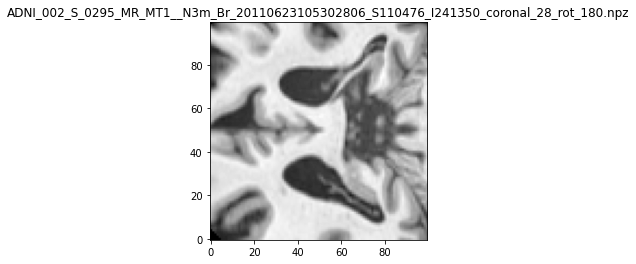

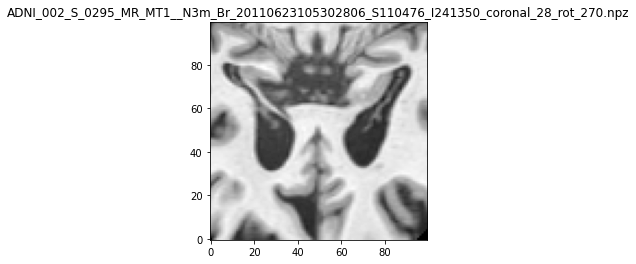

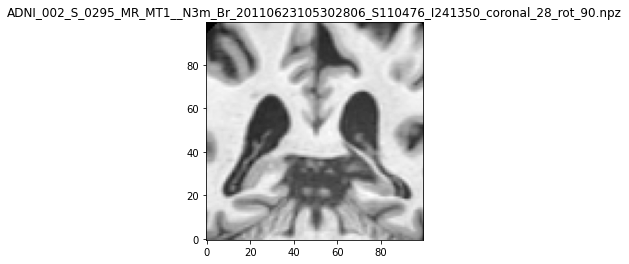

In [99]:
for img_path in np.sort(os.listdir("/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/final_mri_20210327/"))[:6]:
    img = load_mri('/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/final_mri_20210327/'+img_path,as_ants=False)
    plt.imshow(img,cmap="gray", origin="lower")
    plt.title(img_path)
    plt.show()

Processed images seem to be upside down. Let us compare with preprocessed images.

/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



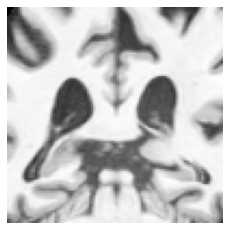

In [20]:
new_input_path = '/home/lucasthim1/mmml-alzheimer-diagnosis/data/preprocessed/20210320/ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350.npz'
sample2 = ants.from_numpy(load_mri(new_input_path,as_ants=False))
sample2.plot(axis =1,figsize=3,slices=[30],reorient=True)

In [7]:
def generate_augmented_slice(image_2d,name='test_img'):
    img_rot_90 = np.rot90(image_2d, k=1, axes=(1,0)).copy()
    img_rot_180 = np.rot90(image_2d, k=2, axes=(1,0)).copy()
    img_rot_270 = np.rot90(image_2d, k=3, axes=(1,0)).copy()
    img_flip_horizonal = np.fliplr(image_2d).copy()
    img_flip_vertical = np.flipud(image_2d).copy()

    img_dict = {
        name:image_2d,
        name+'_rot_90':img_rot_90,
        name+'_rot_180':img_rot_180,
        name+'_rot_270':img_rot_270,
        name+'_flip_horizonal':img_flip_horizonal,
        name+'_flip_vertical':img_flip_vertical
    }
    return img_dict


/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



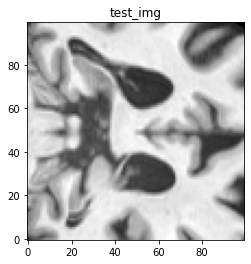

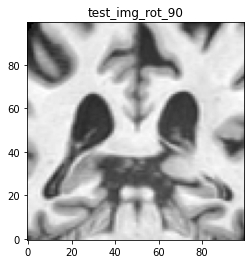

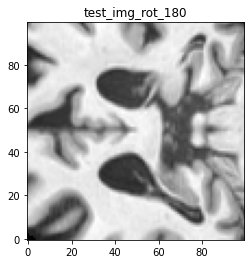

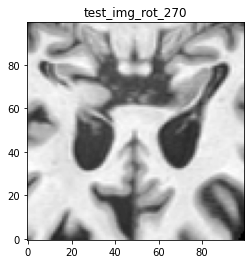

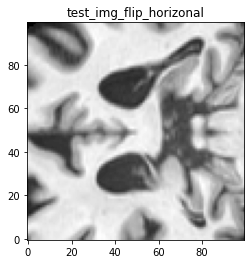

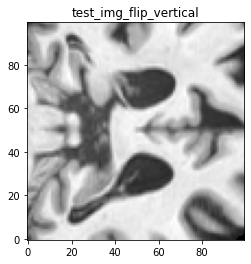

In [25]:
for key,img in img_dict.items():
    plt.imshow(img,cmap="gray", origin="lower")
    plt.title(key)
    plt.show()

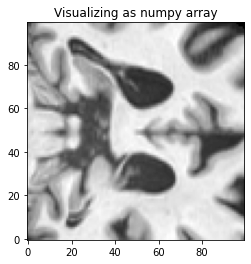

In [42]:
# 0 - Sagittal
# 1 - Coronal
# 2 - Axial
new_input_path = '/home/lucasthim1/mmml-alzheimer-diagnosis/data/preprocessed/20210320/ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350.npz'
image = load_mri(new_input_path,as_ants=False)
image_2d = image[:,30,:]
plt.imshow(image_2d,cmap="gray", origin="lower")
plt.title('Visualizing as numpy array')
plt.show()

/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



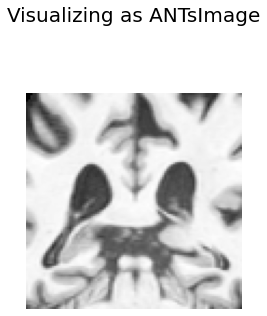

In [27]:
new_input_path = '/home/lucasthim1/mmml-alzheimer-diagnosis/data/preprocessed/20210320/ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350.npz'
sample2 = ants.from_numpy(load_mri(new_input_path,as_ants=False))
sample2.plot(axis =1,figsize=3,slices=[30],reorient=True,title="Visualizing as ANTsImage")

In [166]:
os.listdir('/home/lucasthim1/mmml-alzheimer-diagnosis/data/raw/ADNI_small_set/002_S_1155/MT1__N3m/2011-12-22_09_38_23.0/S134623')

['ADNI_002_S_1155_MR_MT1__N3m_Br_20120201115337754_S134623_I281853.nii']

# Removing NaNs from Images

In [25]:
def image_has_nan(img):
    flag = img.numpy().ravel() != img.numpy().ravel() 
    print(f"Found a total of {flag.sum()} NaN values in image.")
    return flag.sum() > 0 

def replace_nan(img):
    img_np = img.numpy() 
    img_np[img_np != img_np] = np.nanmin(img_np)
    return ants.from_numpy(img_np,direction=img.direction)

In [26]:
path_nan = '/home/lucasthim1/mmml-alzheimer-diagnosis/data/raw/ADNI/153_S_4165/MT1__GradWarp__N3m/2011-08-17_08_54_59.0/S119152/ADNI_153_S_4165_MR_MT1__GradWarp__N3m_Br_20110906115756321_S119152_I254766.nii'
sample_nan = load_mri(path_nan,as_ants=True)

In [27]:
if image_has_nan(sample_nan):
    sample_no_nan = replace_nan(sample_nan)

Found a total of 22247 NaN values in image.


In [28]:
sample_no_nan.numpy().max()

3.393041e+38

# Converting from ANTsImage to Numpy leads to involuntary image rotation

In [170]:
# Normal orientation
# 0 axis = Sagittal
# 1 axis = Coronal
# 2 axis = Axial

new_input_path = '/home/lucasthim1/mmml-alzheimer-diagnosis/data/raw/ADNI_small_set/002_S_1155/MT1__N3m/2011-12-22_09_38_23.0/S134623/ADNI_002_S_1155_MR_MT1__N3m_Br_20120201115337754_S134623_I281853.nii'
img =  ants.image_read(new_input_path).numpy()

img_flip_horizonal = np.fliplr(sample2_np).copy()
img_flip_vertical = np.flipud(sample2_np).copy()

axis = 1
if axis == 0 or axis == 'sagittal':
    rot = np.rot90(img, k=3, axes=(1,2)).copy()
    rot = np.rot90(rot, k=2, axes=(0,2)).copy()
    
elif axis == 1 or axis == 'coronal':
    rot = np.rot90(img, k=3, axes=(0,2)).copy()
    
elif axis == 2 or axis == 'axial':
    rot = np.rot90(img, k=3, axes=(0,1)).copy()

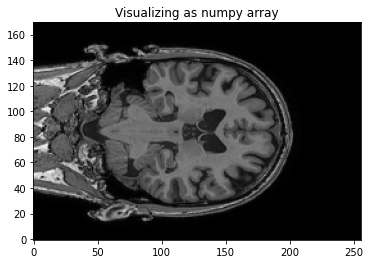

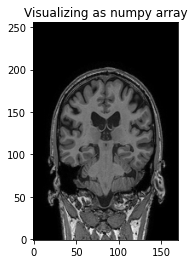

In [185]:
slic=100

plt.imshow(img[:,slic,:],cmap="gray", origin="lower")
plt.title('Visualizing as numpy array')
plt.show()

rot = np.rot90(img, k=3, axes=(0,2)).copy()
plt.imshow(rot[:,slic,:],cmap="gray", origin="lower")
plt.title('Visualizing as numpy array')
plt.show()

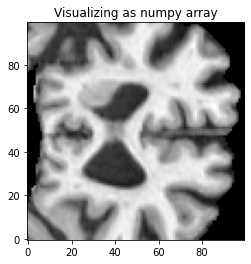

In [41]:
plt.imshow(sample2.numpy()[:,90,:],cmap="gray", origin="lower")
plt.title('Visualizing as numpy array')
plt.show()

In [32]:
img_dict = generate_augmented_slice(sample2.numpy()[:,30,:])

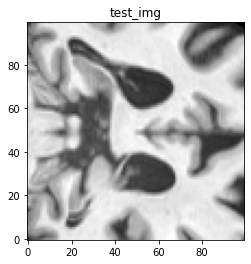

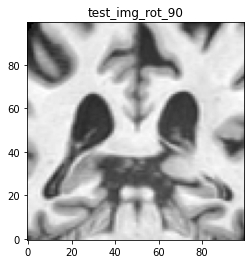

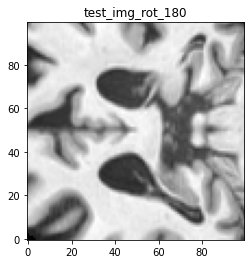

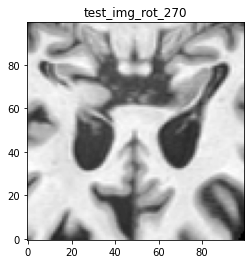

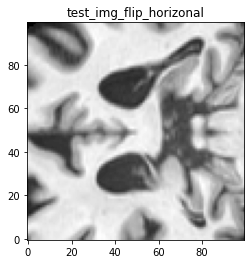

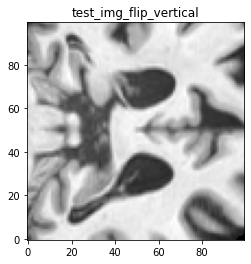

In [33]:
for key,img in img_dict.items():
    plt.imshow(img,cmap="gray", origin="lower")
    plt.title(key)
    plt.show()

In [21]:
image_references = img_dict
output_path= '/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/experiment'
file_format= '.nii.gz'
for key,img in image_references.items():
    save_mri(image = img,name = key,output_path=output_path,file_format=file_format)

Image saved at: /home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/experiment/test_img.nii.gz
Image saved at: /home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/experiment/test_img_rot_90.nii.gz
Image saved at: /home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/experiment/test_img_rot_180.nii.gz
Image saved at: /home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/experiment/test_img_rot_270.nii.gz
Image saved at: /home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/experiment/test_img_flip_horizonal.nii.gz
Image saved at: /home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/experiment/test_img_flip_vertical.nii.gz


/home/lucasthim1/miniconda3/envs/deepbrain/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



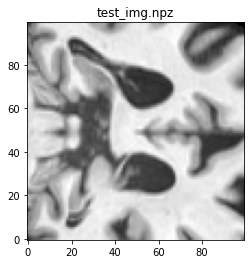

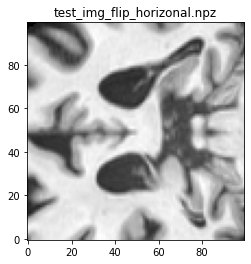

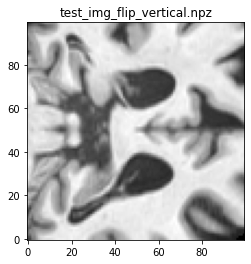

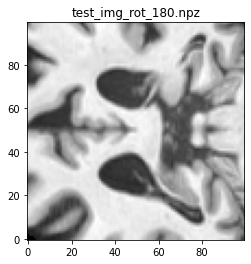

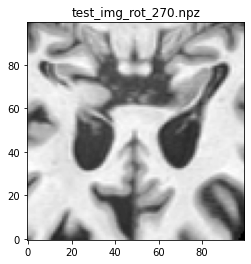

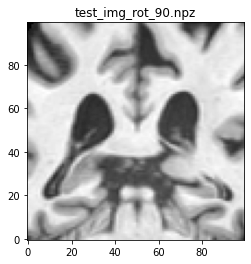

In [11]:
for img_path in np.sort(os.listdir("/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/experiment/"))[:6]:
    img = load_mri('/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/experiment/'+img_path,as_ants=False)
    plt.imshow(img,cmap="gray", origin="lower")
    plt.title(img_path)
    plt.show()

# Testing the last files after the correcting the rotation problem 

In [195]:
np.sort(os.listdir("/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/final_mri_20210327/"))[:6]

array(['ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_flip_horizonal.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_flip_vertical.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_rot_180.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_rot_270.nii.gz',
       'ADNI_002_S_0295_MR_MT1__N3m_Br_20110623105302806_S110476_I241350_coronal_27_rot_90.nii.gz'],
      dtype='<U130')

In [202]:
total_images = np.sort(os.listdir("/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/final_mri_20210327/")).shape[0]
total_images

6792

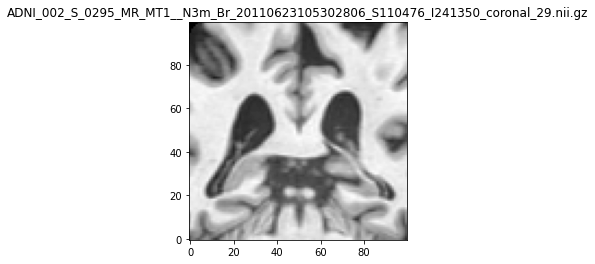

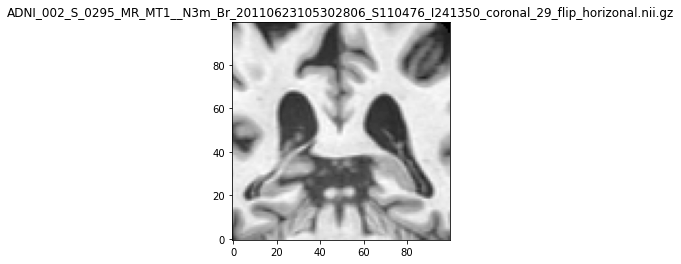

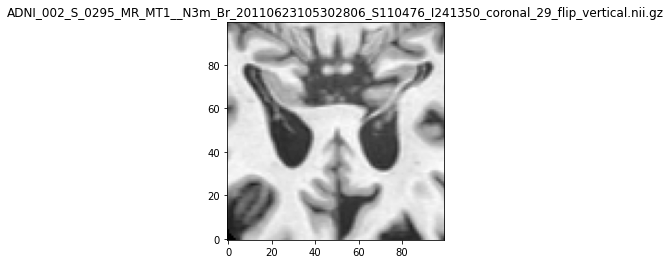

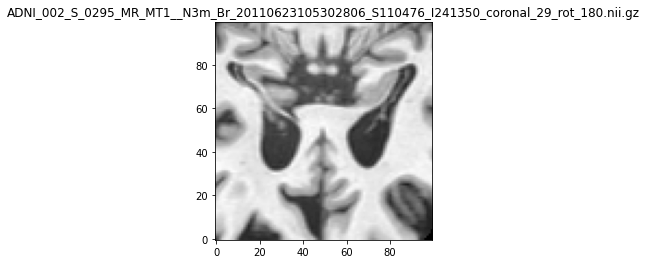

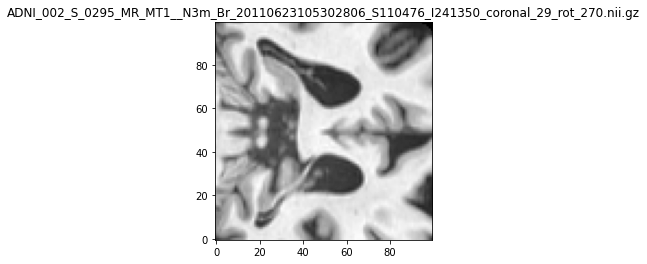

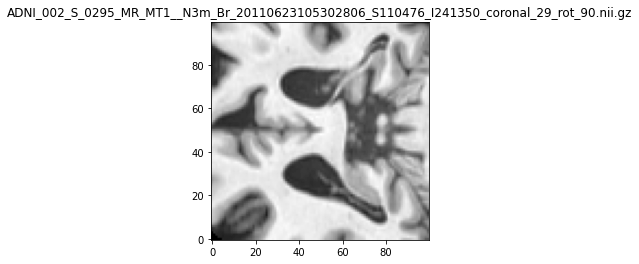

In [200]:
for img_path in np.sort(os.listdir("/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/final_mri_20210327/"))[6:12]:
    img = load_mri('/home/lucasthim1/mmml-alzheimer-diagnosis/data/processed/final_mri_20210327/'+img_path,as_ants=False).numpy()
    plt.imshow(img,cmap="gray", origin="lower")
    plt.title(img_path)
    plt.show()